In [2]:
! pip install -q kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                    title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  

-----------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  

thedrcat/daigt-v2-train-dataset                        DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           2655        233  1.0              

muhammadbinimran/housing-price-prediction-data         Housing Price Prediction Data               763KB  2023-11-21 17:56:32          11871        202  1.0              

thedevastator/global-video-game-sales-and-ratings      Global Video Game Sales and Ratings          71KB  2023-12-20 06:46:32           1479         32  0.9411765        

thedrcat/daigt-proper-train-dataset                    DAIGT Proper Train Dataset                  119MB  2023-11-05 14:03:25           2175

In [1]:
! kaggle datasets download -d puneet6060/intel-image-classification

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.10/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [8]:
! mkdir image_classification

In [9]:
! unzip /content/intel-image-classification.zip -d image_classification

Streaming output truncated to the last 5000 lines.

  inflating: image_classification/seg_train/seg_train/mountain/7506.jpg  

  inflating: image_classification/seg_train/seg_train/mountain/7537.jpg  

  inflating: image_classification/seg_train/seg_train/mountain/7539.jpg  

  inflating: image_classification/seg_train/seg_train/mountain/7551.jpg  

  inflating: image_classification/seg_train/seg_train/mountain/7560.jpg  

  inflating: image_classification/seg_train/seg_train/mountain/7565.jpg  

  inflating: image_classification/seg_train/seg_train/mountain/7578.jpg  

  inflating: image_classification/seg_train/seg_train/mountain/7581.jpg  

  inflating: image_classification/seg_train/seg_train/mountain/7586.jpg  

  inflating: image_classification/seg_train/seg_train/mountain/7647.jpg  

  inflating: image_classification/seg_train/seg_train/mountain/7652.jpg  

  inflating: image_classification/seg_train/seg_train/mountain/7654.jpg  

  inflating: image_classification/seg_train/seg_

In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers

from keras.models import Model, Sequential
from keras import layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# visulization function for Models
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(6, 4))

    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()

    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [3]:
# directories
training_dir="/kaggle/input/intel-image-classification/seg_train/seg_train"
validation_dir="/kaggle/input/intel-image-classification/seg_test/seg_test"

In [4]:
# use this function for preparing data

def prep_data(augmented,batch_size=32):
    if augmented:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

        validation_datagen = ImageDataGenerator(rescale=1./255)

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # training set
    train_set = train_datagen.flow_from_directory(
        training_dir,
        target_size=(150, 150),  # The dimensions to which all images found will be resized
        batch_size=batch_size,# 32  default
        class_mode="sparse") # you can change this to onehotEncoded format or another format

    # validation set
    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=batch_size,  # 32 default
        class_mode="sparse")

    return train_set , validation_set

In [77]:
from tensorflow.keras.preprocessing import image
import numpy as np
def pred_image(path,model):

    # Example image path
    img_path = path

    # Load the image and preprocess it
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values

    # Display the image if needed
    plt.imshow(img)
    plt.show()

    # Make predictions
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])

    # Map the class index to the class label
    class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
    predicted_class_label = class_names[predicted_class_index]

    print(f'Predicted class: {predicted_class_label}')

In [5]:
# augmented train dataset
augmented_train_set,validation_set=prep_data(True)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [6]:
# not augmented train set
straight_train_set,validation_set=prep_data(False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# Some example images from Normal Train Dataset (Not augmented)

In [8]:
images,labels=straight_train_set.next()

class_names = straight_train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

In [9]:
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

for i in range(6):
    axes[i].imshow(images[i])
    label_index = int(labels[i])
    class_name = class_names[label_index]
    axes[i].set_title(f"{class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [11]:
# augmented dataset
images,labels=augmented_train_set.next()

class_names = augmented_train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

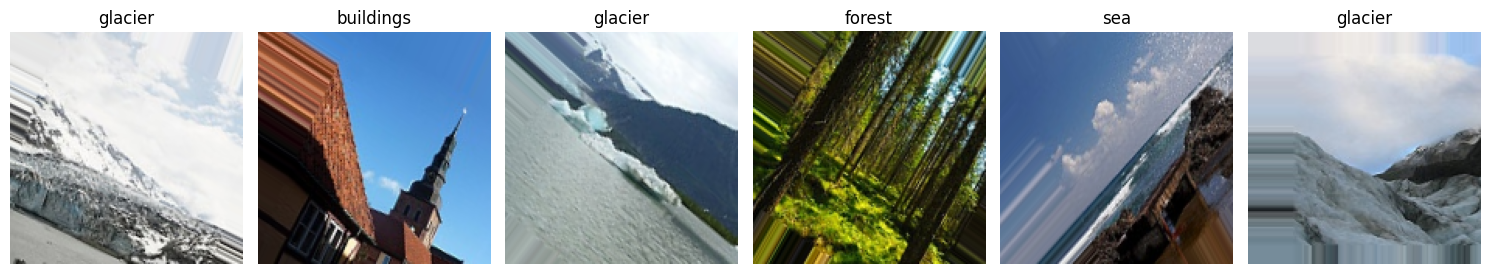

In [12]:
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

for i in range(6):
    axes[i].imshow(images[i])
    label_index = int(labels[i])
    class_name = class_names[label_index]
    axes[i].set_title(f"{class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Model 1.1 Simple CNN Model (without augmentation)

In [13]:
train_set,validation_set=prep_data(False) # set false for not augmented data

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [14]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(6, activation='softmax'))


In [15]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),
    loss='sparse_categorical_crossentropy', # labels are in integer form
    metrics=['accuracy'])

In [28]:
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(
    train_set,
    epochs=10,
    validation_data=validation_set,)

Epoch 1/10
439/439 [==============================] - 96s 195ms/step - loss: 1.1525 - accuracy: 0.5527 - val_loss: 0.9332 - val_accuracy: 0.6310
Epoch 2/10
439/439 [==============================] - 24s 54ms/step - loss: 0.8682 - accuracy: 0.6772 - val_loss: 0.7236 - val_accuracy: 0.7453
Epoch 3/10
439/439 [==============================] - 23s 53ms/step - loss: 0.7412 - accuracy: 0.7268 - val_loss: 0.7305 - val_accuracy: 0.7280
Epoch 4/10
439/439 [==============================] - 23s 52ms/step - loss: 0.6534 - accuracy: 0.7610 - val_loss: 0.6076 - val_accuracy: 0.7730
Epoch 5/10
439/439 [==============================] - 25s 57ms/step - loss: 0.5903 - accuracy: 0.7870 - val_loss: 0.5540 - val_accuracy: 0.8023
Epoch 6/10
439/439 [==============================] - 26s 59ms/step - loss: 0.5338 - accuracy: 0.8070 - val_loss: 0.5308 - val_accuracy: 0.8097
Epoch 7/10
439/439 [==============================] - 26s 58ms/step - loss: 0.4948 - accuracy: 0.8234 - val_loss: 0.5358 - val_accuracy

In [17]:
visualize(history)

In [18]:
loss,accuracy=model.evaluate(train_set)
print(f'the loss is {loss} and the accuracy ={accuracy}')

439/439 [==============================] - 20s 45ms/step - loss: 0.3145 - accuracy: 0.8839
the loss is 0.3144753575325012 and the accuracy =0.8838534951210022


In [19]:
loss_test,accuracy_test=model.evaluate(validation_set)
print(f'the loss is_test {loss_test} and the accuracy_test ={accuracy_test}')

94/94 [==============================] - 4s 45ms/step - loss: 0.4967 - accuracy: 0.8340
the loss is_test 0.4967328608036041 and the accuracy_test =0.8339999914169312


In [20]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [21]:
import numpy as np

def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()


In [25]:
predictions = model.predict(validation_set)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


94/94 [==============================] - 3s 34ms/step


In [90]:
from tensorflow.keras.preprocessing import image
import numpy as np

pred_image('/kaggle/input/imagessssssssss/pexels-pixabay-417173.jpg',model)


1/1 [==============================] - 0s 20ms/step
Predicted class: sea


In [91]:
pred_image('/kaggle/input/imagessssssssss/imag.jpg',model)


1/1 [==============================] - 0s 19ms/step
Predicted class: street


# Model 1.2 Simple CNN model with Data Augmentation

In [33]:
train_set,validation_set=prep_data(True)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [34]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(6, activation='softmax'))

In [35]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),
    loss='sparse_categorical_crossentropy', # labels are in integer form
    metrics=['accuracy'])

In [36]:
# model and compile settings are same , i will directly fit data
history1_2 = model.fit(
    train_set,
    epochs=10,
    validation_data=validation_set,
    validation_steps=50)

Epoch 1/10
439/439 [==============================] - 103s 231ms/step - loss: 1.2518 - accuracy: 0.5026 - val_loss: 1.1198 - val_accuracy: 0.5763
Epoch 2/10
439/439 [==============================] - 102s 233ms/step - loss: 1.0524 - accuracy: 0.5928 - val_loss: 0.8191 - val_accuracy: 0.6906
Epoch 3/10
439/439 [==============================] - 101s 230ms/step - loss: 0.9680 - accuracy: 0.6316 - val_loss: 0.7663 - val_accuracy: 0.7325
Epoch 4/10
439/439 [==============================] - 102s 232ms/step - loss: 0.9085 - accuracy: 0.6583 - val_loss: 0.7707 - val_accuracy: 0.6994
Epoch 5/10
439/439 [==============================] - 104s 236ms/step - loss: 0.8539 - accuracy: 0.6795 - val_loss: 0.6772 - val_accuracy: 0.7544
Epoch 6/10
439/439 [==============================] - 101s 229ms/step - loss: 0.8246 - accuracy: 0.6931 - val_loss: 0.7559 - val_accuracy: 0.7325
Epoch 7/10
439/439 [==============================] - 101s 230ms/step - loss: 0.7883 - accuracy: 0.7113 - val_loss: 0.5940 -

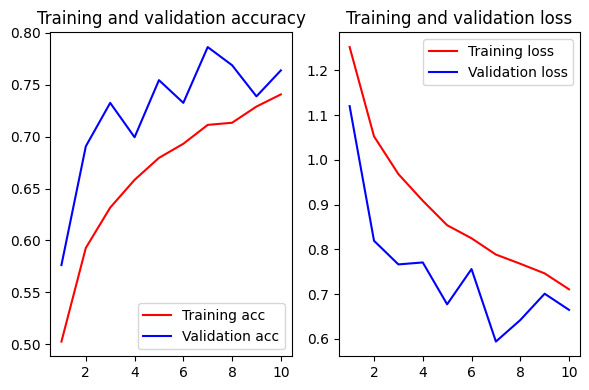

In [37]:
visualize(history1_2)

In [38]:
loss_test,accuracy_test=model.evaluate(validation_set)
print(f'the loss is {loss} and the accuracy ={accuracy}')

94/94 [==============================] - 7s 72ms/step - loss: 0.6712 - accuracy: 0.7623
the loss is 0.3144753575325012 and the accuracy =0.8838534951210022


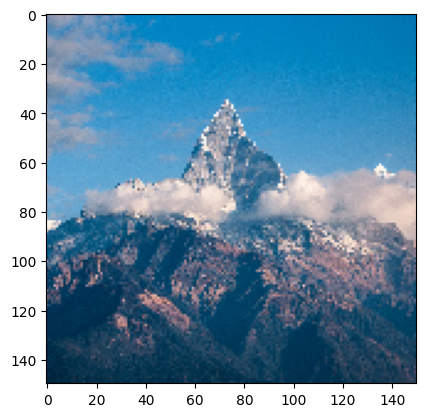

1/1 [==============================] - 0s 20ms/step
Predicted class: sea


In [88]:
from tensorflow.keras.preprocessing import image
import numpy as np

pred_image('/kaggle/input/images/pexels-pixabay-417173.jpg',model)

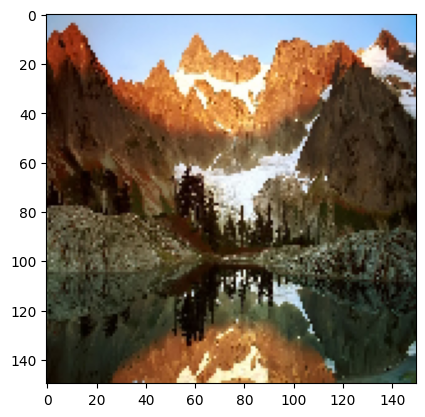

1/1 [==============================] - 0s 19ms/step
Predicted class: street


In [92]:
pred_image('/kaggle/input/imagessssssssss/imag.jpg',model)

# Model 2.1 More Complex CNN model

In [41]:
train_set,validation_set=prep_data(False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [42]:
model3 = models.Sequential()

model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))


model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.Flatten())

model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(6, activation='softmax'))

In [43]:
model3.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=2e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [44]:
model2_1 = model3.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
        )

Epoch 1/20
439/439 [==============================] - 27s 57ms/step - loss: 1.2696 - accuracy: 0.4916 - val_loss: 0.9774 - val_accuracy: 0.6260
Epoch 2/20
439/439 [==============================] - 24s 56ms/step - loss: 0.9617 - accuracy: 0.6408 - val_loss: 0.9738 - val_accuracy: 0.6317
Epoch 3/20
439/439 [==============================] - 25s 56ms/step - loss: 0.8190 - accuracy: 0.7022 - val_loss: 0.7274 - val_accuracy: 0.7423
Epoch 4/20
439/439 [==============================] - 23s 53ms/step - loss: 0.7230 - accuracy: 0.7433 - val_loss: 0.6234 - val_accuracy: 0.7750
Epoch 5/20
439/439 [==============================] - 24s 55ms/step - loss: 0.6483 - accuracy: 0.7723 - val_loss: 0.5850 - val_accuracy: 0.7937
Epoch 6/20
439/439 [==============================] - 25s 56ms/step - loss: 0.5925 - accuracy: 0.7908 - val_loss: 0.5597 - val_accuracy: 0.8113
Epoch 7/20
439/439 [==============================] - 24s 54ms/step - loss: 0.5567 - accuracy: 0.8097 - val_loss: 0.5537 - val_accuracy:

In [59]:
loss_test,accuracy_test=model3.evaluate(validation_set)
print(f'the loss is {loss_test} and the accuracy ={accuracy_test}')

94/94 [==============================] - 4s 46ms/step - loss: 0.5288 - accuracy: 0.8503
the loss is 0.5288066864013672 and the accuracy =0.8503333330154419


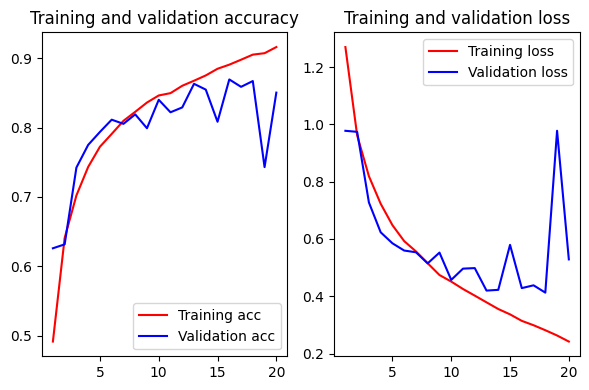

In [45]:
visualize(model2_1)

In [46]:
model2_1.params

{'verbose': 1, 'epochs': 20, 'steps': 439}

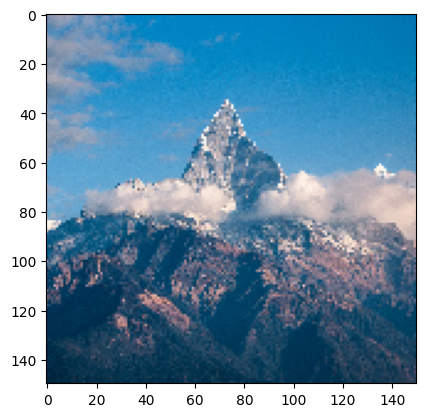

1/1 [==============================] - 0s 20ms/step
Predicted class: mountain


In [87]:
from tensorflow.keras.preprocessing import image
import numpy as np

pred_image('/kaggle/input/images/pexels-pixabay-417173.jpg',model3)


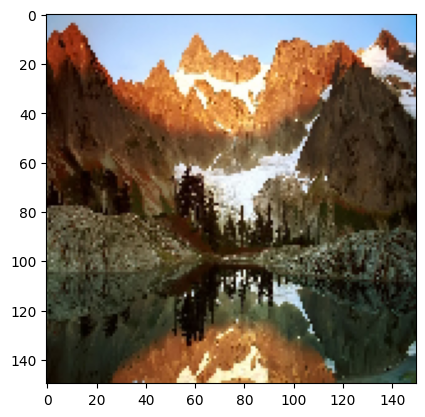

1/1 [==============================] - 0s 20ms/step
Predicted class: sea


In [93]:
pred_image('/kaggle/input/imagessssssssss/imag.jpg',model3)

# Pretrained Models

In [62]:
from tensorflow.keras.applications import VGG16

In [63]:
train_set,validation_set=prep_data(False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [64]:
conv_base = VGG16(
    weights='imagenet',   # one of None (random initialization), "imagenet" (pre-training on ImageNet), or the path to the weights file to be loaded.
    include_top=False,     #  whether to include the 3 fully-connected layers at the top of the network.
    input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [65]:
for layer in conv_base.layers:
     layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [66]:
model_vgg = models.Sequential()
model_vgg.add(conv_base)
model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(128, activation='relu'))
model_vgg.add(layers.Dropout(0.5))
model_vgg.add(layers.Dense(6, activation='softmax'))

In [67]:
model_vgg.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [68]:
# early stopping
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [69]:
history3_1 = model_vgg.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    callbacks=[callback])

Epoch 1/20
439/439 [==============================] - 44s 91ms/step - loss: 0.5934 - accuracy: 0.7840 - val_loss: 0.3805 - val_accuracy: 0.8597
Epoch 2/20
439/439 [==============================] - 35s 79ms/step - loss: 0.4085 - accuracy: 0.8536 - val_loss: 0.3591 - val_accuracy: 0.8670
Epoch 3/20
439/439 [==============================] - 35s 80ms/step - loss: 0.3509 - accuracy: 0.8792 - val_loss: 0.3414 - val_accuracy: 0.8750
Epoch 4/20
439/439 [==============================] - 35s 80ms/step - loss: 0.3225 - accuracy: 0.8866 - val_loss: 0.3322 - val_accuracy: 0.8770
Epoch 5/20
439/439 [==============================] - 35s 80ms/step - loss: 0.3024 - accuracy: 0.8943 - val_loss: 0.3353 - val_accuracy: 0.8780
Epoch 6/20
439/439 [==============================] - 35s 80ms/step - loss: 0.2829 - accuracy: 0.9031 - val_loss: 0.3224 - val_accuracy: 0.8867
Epoch 7/20
439/439 [==============================] - 35s 80ms/step - loss: 0.2636 - accuracy: 0.9059 - val_loss: 0.3652 - val_accuracy:

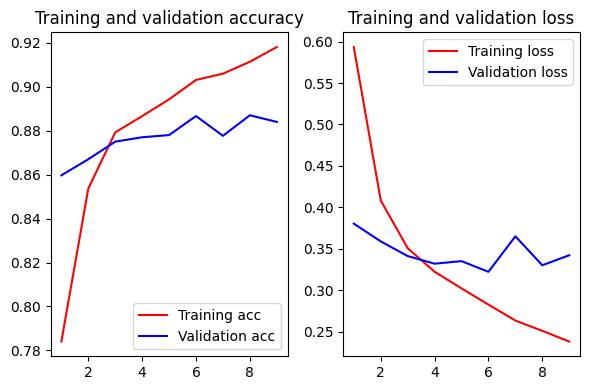

In [70]:
visualize(history3_1)

In [71]:
loss_train,accuracy_train=model_vgg.evaluate(train_set)
print(f'the loss is {loss_train} and the accuracy ={accuracy_train}')

439/439 [==============================] - 31s 71ms/step - loss: 0.1684 - accuracy: 0.9416
the loss is 0.1683603823184967 and the accuracy =0.9416417479515076


In [72]:
loss_test,accuracy_test=model_vgg.evaluate(validation_set)
print(f'the loss is {loss_test} and the accuracy ={accuracy_test}')

94/94 [==============================] - 7s 70ms/step - loss: 0.3424 - accuracy: 0.8840
the loss is 0.3423655927181244 and the accuracy =0.8840000033378601


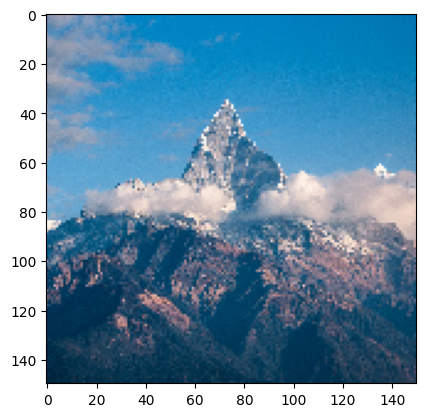

1/1 [==============================] - 0s 20ms/step
Predicted class: mountain


In [86]:
pred_image('/kaggle/input/images/pexels-pixabay-417173.jpg',model_vgg)


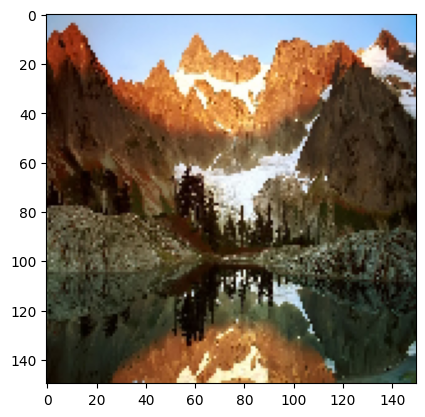

1/1 [==============================] - 0s 19ms/step
Predicted class: mountain


In [94]:
pred_image('/kaggle/input/imagessssssssss/imag.jpg',model_vgg)

# Model 3.2 Feature Extraction with Data Augmentation 

In [95]:
train_set,validation_set=prep_data(True)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [96]:
conv_base = VGG16(
    weights='imagenet',   # one of None (random initialization), "imagenet" (pre-training on ImageNet), or the path to the weights file to be loaded.
    include_top=False,     #  whether to include the 3 fully-connected layers at the top of the network.
    input_shape=(150, 150, 3))

# in this part i am gonna do feature extraction therefore i set layers to untrainable
for layer in conv_base.layers:
     layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [97]:
model3_aug = models.Sequential()
model3_aug.add(conv_base)
model3_aug.add(layers.Flatten())
model3_aug.add(layers.Dense(128, activation='relu'))
model3_aug.add(layers.Dropout(0.5))
model3_aug.add(layers.Dense(6, activation='softmax'))

In [98]:
model3_aug.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [99]:
history3_2 = model3_aug.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    callbacks=[callback])

Epoch 1/20
439/439 [==============================] - 118s 266ms/step - loss: 0.8220 - accuracy: 0.6922 - val_loss: 0.4645 - val_accuracy: 0.8303
Epoch 2/20
439/439 [==============================] - 109s 248ms/step - loss: 0.6211 - accuracy: 0.7698 - val_loss: 0.4152 - val_accuracy: 0.8460
Epoch 3/20
439/439 [==============================] - 110s 249ms/step - loss: 0.5742 - accuracy: 0.7944 - val_loss: 0.4162 - val_accuracy: 0.8500
Epoch 4/20
439/439 [==============================] - 109s 247ms/step - loss: 0.5540 - accuracy: 0.8008 - val_loss: 0.3829 - val_accuracy: 0.8563
Epoch 5/20
439/439 [==============================] - 108s 247ms/step - loss: 0.5431 - accuracy: 0.8065 - val_loss: 0.3898 - val_accuracy: 0.8580
Epoch 6/20
439/439 [==============================] - 109s 248ms/step - loss: 0.5312 - accuracy: 0.8126 - val_loss: 0.3986 - val_accuracy: 0.8540
Epoch 7/20
439/439 [==============================] - 109s 247ms/step - loss: 0.5165 - accuracy: 0.8169 - val_loss: 0.3876 -

In [100]:
visualize(history3_2)

In [103]:
loss_train,accuracy_train=model3_aug.evaluate(train_set)
print(f'the loss is {loss_train} and the accuracy ={accuracy_train}')

439/439 [==============================] - 104s 236ms/step - loss: 0.4381 - accuracy: 0.8432
the loss is 0.4380802512168884 and the accuracy =0.8432378768920898


In [104]:
loss_test,accuracy_test=model3_aug.evaluate(validation_set)
print(f'the loss is {loss_test} and the accuracy ={accuracy_test}')

94/94 [==============================] - 6s 67ms/step - loss: 0.3876 - accuracy: 0.8577
the loss is 0.38755476474761963 and the accuracy =0.8576666712760925


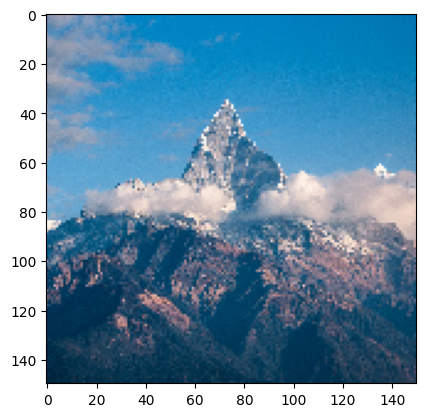

1/1 [==============================] - 0s 145ms/step
Predicted class: mountain


In [106]:
pred_image('/kaggle/input/imagessssssssss/pexels-pixabay-417173.jpg',model3_aug)


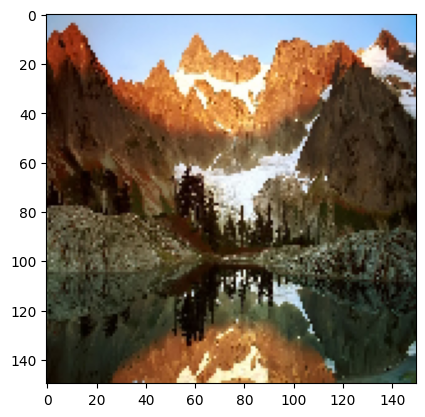

1/1 [==============================] - 0s 22ms/step
Predicted class: mountain


In [107]:
pred_image('/kaggle/input/imagessssssssss/imag.jpg',model3_aug)

# Model 4.1 Fine Tuning

In [108]:
train_set,validation_set=prep_data(False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [109]:
base_model = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [110]:
# with block5_conv1 i will start to train model
# you can see block5_conv1 from above

base_model.trainable = True
set_trainable = False

for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [111]:
model_fine = Sequential()
model_fine.add(base_model)
model_fine.add(layers.Flatten())
model_fine.add(layers.Dense(256, activation='relu'))
model_fine.add(layers.Dropout(0.3))
model_fine.add(layers.Dense(6, activation='softmax'))

model_fine.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),
    metrics=['accuracy']
)

model_fine.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 6)                 1542      
                                                                 
Total params: 16813638 (64.14 MB)
Trainable params: 9178374 (35.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [112]:
fine_tune_31 = model_fine.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
439/439 [==============================] - 45s 96ms/step - loss: 0.4901 - accuracy: 0.8269 - val_loss: 0.3169 - val_accuracy: 0.8983
Epoch 2/20
439/439 [==============================] - 40s 92ms/step - loss: 0.2983 - accuracy: 0.9006 - val_loss: 0.2944 - val_accuracy: 0.9073
Epoch 3/20
439/439 [==============================] - 41s 93ms/step - loss: 0.2400 - accuracy: 0.9200 - val_loss: 0.3373 - val_accuracy: 0.9097
Epoch 4/20
439/439 [==============================] - 41s 93ms/step - loss: 0.1970 - accuracy: 0.9372 - val_loss: 0.2917 - val_accuracy: 0.9103
Epoch 5/20
439/439 [==============================] - 41s 93ms/step - loss: 0.1536 - accuracy: 0.9495 - val_loss: 0.3792 - val_accuracy: 0.9017
Epoch 6/20
439/439 [==============================] - 41s 93ms/step - loss: 0.1447 - accuracy: 0.9543 - val_loss: 0.4180 - val_accuracy: 0.9063
Epoch 7/20
439/439 [==============================] - 41s 93ms/step - loss: 0.1251 - accuracy: 0.9624 - val_loss: 0.6352 - val_accuracy:

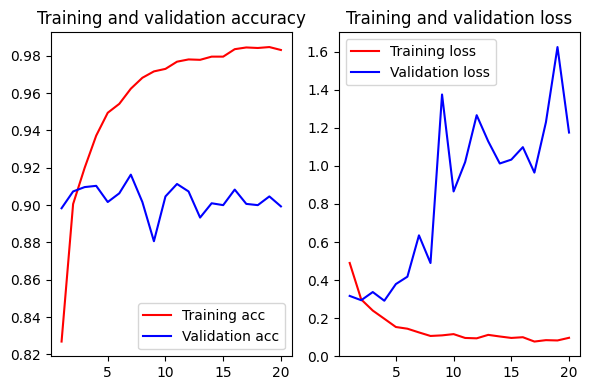

In [113]:
visualize(fine_tune_31)

In [114]:
loss_train,accuracy_train=model_fine.evaluate(train_set)
print(f'the loss is {loss_train} and the accuracy ={accuracy_train}')

439/439 [==============================] - 30s 67ms/step - loss: 0.0240 - accuracy: 0.9935
the loss is 0.024006489664316177 and the accuracy =0.9935157299041748


In [115]:
loss_test,accuracy_test=model_fine.evaluate(validation_set)
print(f'the loss is {loss_test} and the accuracy ={accuracy_test}')

94/94 [==============================] - 6s 67ms/step - loss: 1.1754 - accuracy: 0.8993
the loss is 1.175364375114441 and the accuracy =0.8993333578109741


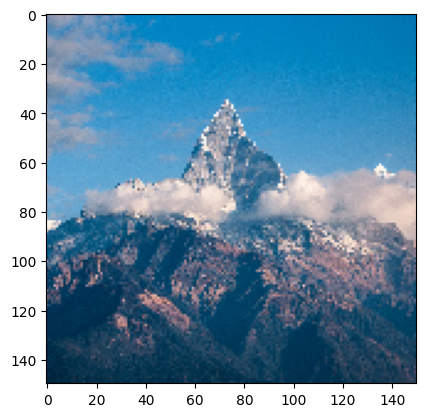

1/1 [==============================] - 0s 142ms/step
Predicted class: mountain


In [116]:
pred_image('/kaggle/input/imagessssssssss/pexels-pixabay-417173.jpg',model_fine)


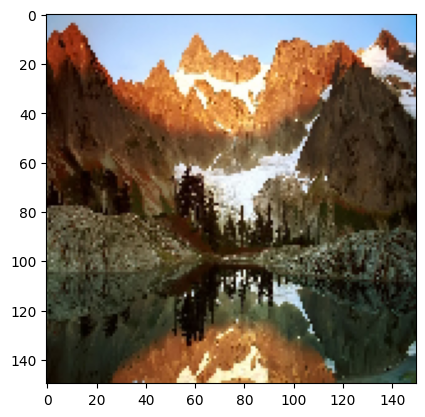

1/1 [==============================] - 0s 20ms/step
Predicted class: mountain


In [117]:
pred_image('/kaggle/input/imagessssssssss/imag.jpg',model_fine)

# save_model

In [252]:
model_vgg.save('"model_vgg_.h5"')

In [254]:
loaded_model = load_model('/content/"model_vgg_.h5"')

In [255]:
from tensorflow.keras.models import load_model
model_json = model.to_json()
with open('/content/"model_vgg_".json', 'w') as json_file:
    json_file.write(model_json)

In [257]:
from tensorflow.keras.models import model_from_json

# Load the model architecture from the JSON file
with open('/content/"model_vgg_".json', 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

In [199]:
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Load the saved weights
loaded_model.load_weights('/content/"model.h5"')